In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

In [46]:
d1 = pd.read_parquet(r"E:\Learning\TEAI Cup\Data\Parquet Data\d1_1_general_filtering.parquet")
d2 = pd.read_parquet(r"E:\Learning\TEAI Cup\Data\Parquet Data\d2_1_general_cleaning.parquet")


In [47]:
d1

,machine_id,machine_event_start_timestamp,machine_event_start_end_timestamp,part_number,tool_number
0,S-268,2025-12-05 06:00:00,2025-12-05 07:23:47,2-1703930-2,S1829661
1,S-269,2025-12-05 06:00:00,2025-12-05 06:01:46,2-1703930-1,S1956413
2,S-276,2025-12-05 06:00:00,2025-12-05 06:03:39,7-1452668-3,S1829585
3,S-269,2025-12-05 06:02:17,2025-12-05 06:17:37,2-1703930-1,S1956413
4,S-226,2025-12-05 06:02:54,2025-12-05 06:03:18,5-965906-1,S0025195
...,...,...,...,...,...
1555,S-276,2025-12-10 05:43:39,2025-12-10 05:52:53,(null),(null)
1556,S-276,2025-12-10 05:54:30,2025-12-10 05:55:45,(null),(null)
1557,S-268,2025-12-10 06:00:00,2025-12-10 06:05:06,(null),(null)
1558,S-223,2025-12-10 06:00:00,2025-12-10 06:03:58,(null),(null)


In [48]:
d2

,machine_id,variable_name,value,timestamp,lowerLimit,upperLimit,nominalValue
2090171,S-226,stpStepFrIda,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",2025-12-05 08:15:13,-0.10,0.10,1.00
2090157,S-226,teil2Wire,"1.9513,1.9592,1.9489,1.9397,1.962,1.9648,1.944...",2025-12-05 08:15:13,-0.20,0.20,2.00
2090158,S-226,teil2Iso,"3.4863,3.4962,3.4957,3.4841,3.4901,3.4888,3.48...",2025-12-05 08:15:13,-0.20,0.20,3.50
2090159,S-226,iTeil2IsostempelDef,"49.1378,48.7538,48.448,48.9035,48.923,48.8579,...",2025-12-05 08:15:13,-10.00,10.00,50.00
2090160,S-226,folgefehlerTeil12,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2025-12-05 08:15:13,0.00,10.00,0.00
...,...,...,...,...,...,...,...
2089377,S-226,teil1GapY,"0.5029,0.5018,0.4951,0.5008,0.5047,0.5,0.5043,...",2025-12-10 11:08:06,-0.06,0.00,0.53
2089378,S-226,teil1GapX,"0.509,0.5071,0.506,0.5134,0.509,0.5134,0.5062,...",2025-12-10 11:08:06,-0.06,0.00,0.53
2089379,S-226,iTeil1Rastfeder,"44.3393,44.7688,46.0992,46.3617,46.1708,46.349...",2025-12-10 11:08:06,-25.00,25.00,50.00
2089373,S-226,teil2Wire,"1.9311,1.9314,1.922,1.9411,1.9336,1.9271,1.935...",2025-12-10 11:08:06,-0.20,0.20,2.00


In [49]:
# Combining Way
# Machine code from d1 match with d2
# Timestamp bn start and end of d1 in d2 group them
# For simplification lets make a combined dataset for S-223

In [50]:
# Lets make variable names consistent first

# device_id -> machine_id in d2
d2 = d2.rename({'device_name': 'machine_id'}, axis=1)
d2

,machine_id,variable_name,value,timestamp,lowerLimit,upperLimit,nominalValue
2090171,S-226,stpStepFrIda,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",2025-12-05 08:15:13,-0.10,0.10,1.00
2090157,S-226,teil2Wire,"1.9513,1.9592,1.9489,1.9397,1.962,1.9648,1.944...",2025-12-05 08:15:13,-0.20,0.20,2.00
2090158,S-226,teil2Iso,"3.4863,3.4962,3.4957,3.4841,3.4901,3.4888,3.48...",2025-12-05 08:15:13,-0.20,0.20,3.50
2090159,S-226,iTeil2IsostempelDef,"49.1378,48.7538,48.448,48.9035,48.923,48.8579,...",2025-12-05 08:15:13,-10.00,10.00,50.00
2090160,S-226,folgefehlerTeil12,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2025-12-05 08:15:13,0.00,10.00,0.00
...,...,...,...,...,...,...,...
2089377,S-226,teil1GapY,"0.5029,0.5018,0.4951,0.5008,0.5047,0.5,0.5043,...",2025-12-10 11:08:06,-0.06,0.00,0.53
2089378,S-226,teil1GapX,"0.509,0.5071,0.506,0.5134,0.509,0.5134,0.5062,...",2025-12-10 11:08:06,-0.06,0.00,0.53
2089379,S-226,iTeil1Rastfeder,"44.3393,44.7688,46.0992,46.3617,46.1708,46.349...",2025-12-10 11:08:06,-25.00,25.00,50.00
2089373,S-226,teil2Wire,"1.9311,1.9314,1.922,1.9411,1.9336,1.9271,1.935...",2025-12-10 11:08:06,-0.20,0.20,2.00


In [51]:
machine_id = 'S-223'

In [52]:
d1_S223 = d1[d1.machine_id == machine_id]
d1_S223

,machine_id,machine_event_start_timestamp,machine_event_start_end_timestamp,part_number,tool_number
19,S-223,2025-12-05 06:40:59,2025-12-05 06:43:08,5-963715-1,S0275910
29,S-223,2025-12-05 06:56:26,2025-12-05 07:01:43,5-963715-1,S0275910
33,S-223,2025-12-05 07:07:36,2025-12-05 07:08:08,5-963715-1,S0275910
37,S-223,2025-12-05 07:09:33,2025-12-05 07:09:52,5-963715-1,S0275910
38,S-223,2025-12-05 07:11:18,2025-12-05 07:11:35,5-963715-1,S0275910
...,...,...,...,...,...
1522,S-223,2025-12-10 04:02:54,2025-12-10 04:03:20,5-963715-1,S0275910
1523,S-223,2025-12-10 04:03:40,2025-12-10 04:18:58,5-963715-1,S0275910
1530,S-223,2025-12-10 04:21:27,2025-12-10 05:22:36,5-963715-1,S0275910
1550,S-223,2025-12-10 05:38:46,2025-12-10 06:00:00,5-963715-1,S0275910


In [53]:
d2_S223 = d2[d2.machine_id == machine_id]
d2_S223

,machine_id,variable_name,value,timestamp,lowerLimit,upperLimit,nominalValue
2089818,S-223,teil1GapX,"0.501,0.488,0.491,0.497,0.502,0.496,0.488,0.49...",2025-12-05 08:15:16,-0.06499,0.00499,0.53
2089832,S-223,teil2Iso,"2.773,2.777,2.78,2.776,2.777,2.767,2.778,2.78,...",2025-12-05 08:15:16,-0.20000,0.20000,2.70
2089833,S-223,teil2Bodyltstelle,"2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...",2025-12-05 08:15:16,-0.10000,1.00000,1.00
2089835,S-223,federdeckelDeformiert,"80.952,88.69,86.706,87.5,78.968,76.587,88.095,...",2025-12-05 08:15:16,-10.00000,40.00000,60.00
2089836,S-223,teil2GapX,"0.496,0.491,0.491,0.494,0.492,0.48,0.494,0.496...",2025-12-05 08:15:16,-0.06499,0.00499,0.53
...,...,...,...,...,...,...,...
2089074,S-223,iT1Rastfederdifferenz,"0.003,0.003,0.001,0.003,0.001,0.001,0.003,0.00...",2025-12-10 11:08:01,-0.08000,0.08000,0.00
2089073,S-223,iT1RastfederDeformiert,"50.53,47.28,45.388,46.476,48.272,48.748,47.877...",2025-12-10 11:08:01,-20.00000,22.00000,50.00
2089072,S-223,teil1GapY,"0.501,0.493,0.505,0.495,0.491,0.495,0.503,0.49...",2025-12-10 11:08:01,-0.06499,0.00499,0.53
2089092,S-223,iT2Rastfederdifferenz,"0.021,0.016,0.02,0.025,0.021,0.019,0.017,0.015...",2025-12-10 11:08:01,-0.08000,0.08000,0.00


In [102]:
sample = d1.sample()
machine_id = sample.machine_id.values[0]
start_time = pd.to_datetime(sample.machine_event_start_timestamp.values[0])
end_time = pd.to_datetime(sample.machine_event_start_end_timestamp.values[0])
part_number = sample.part_number.values[0]
tool_number = sample.tool_number.values[0]

print(f"Machine ID: {machine_id} \nStart Time: {start_time} \nEnd Time: {end_time} \nPart Number: {part_number} \nTool Number: {tool_number}")

Machine ID: S-223 
Start Time: 2025-12-05 20:45:49 
End Time: 2025-12-05 21:22:28 
Part Number: 5-963715-1 
Tool Number: S0275910


In [103]:
small_data = d2[(d2.timestamp >= start_time) & (d2.timestamp <= end_time) & (d2.machine_id == machine_id)]
small_data

,machine_id,variable_name,value,timestamp,lowerLimit,upperLimit,nominalValue
335448,S-223,iT2CrimpDeformiert,"1.815,1.813,1.812,1.814,1.814,1.812,1.815,1.81...",2025-12-05 20:45:51,0.0,0.12,1.75
335449,S-223,teil2Wire,"1.97,1.96,1.971,1.969,1.969,1.969,1.976,1.972,...",2025-12-05 20:45:51,-0.2,0.20,2.00
335450,S-223,teil2Iso,"2.804,2.794,2.811,2.797,2.807,2.803,2.808,2.80...",2025-12-05 20:45:51,-0.2,0.20,2.70
335442,S-223,teil1Wire,"1.948,1.943,1.947,1.955,1.943,1.948,1.949,1.95...",2025-12-05 20:45:51,-0.2,0.20,2.00
335452,S-223,teil2Federltstelle,"2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...",2025-12-05 20:45:51,-0.1,1.00,1.00
...,...,...,...,...,...,...,...
343724,S-223,teil1Wire,"1.964,1.965,1.963,1.956,1.961,1.956,1.96,1.955...",2025-12-05 20:59:54,-0.2,0.20,2.00
343725,S-223,teil1Iso,"2.787,2.784,2.783,2.775,2.781,2.777,2.782,2.77...",2025-12-05 20:59:54,-0.2,0.20,2.70
343726,S-223,teil1Bodyltstelle,"2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...",2025-12-05 20:59:54,-0.1,1.00,1.00
343727,S-223,teil1Federltstelle,"2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...",2025-12-05 20:59:54,-0.1,1.00,1.00


In [104]:
def average_of_value(x):
    nums = list(map(float, x.split(",")))
    return np.mean(nums)

In [105]:
small_data['average_value'] = small_data['value'].apply(average_of_value)
small_data

,machine_id,variable_name,value,timestamp,lowerLimit,upperLimit,nominalValue,average_value
335448,S-223,iT2CrimpDeformiert,"1.815,1.813,1.812,1.814,1.814,1.812,1.815,1.81...",2025-12-05 20:45:51,0.0,0.12,1.75,1.81233
335449,S-223,teil2Wire,"1.97,1.96,1.971,1.969,1.969,1.969,1.976,1.972,...",2025-12-05 20:45:51,-0.2,0.20,2.00,1.97331
335450,S-223,teil2Iso,"2.804,2.794,2.811,2.797,2.807,2.803,2.808,2.80...",2025-12-05 20:45:51,-0.2,0.20,2.70,2.80743
335442,S-223,teil1Wire,"1.948,1.943,1.947,1.955,1.943,1.948,1.949,1.95...",2025-12-05 20:45:51,-0.2,0.20,2.00,1.94949
335452,S-223,teil2Federltstelle,"2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...",2025-12-05 20:45:51,-0.1,1.00,1.00,2.00000
...,...,...,...,...,...,...,...,...
343724,S-223,teil1Wire,"1.964,1.965,1.963,1.956,1.961,1.956,1.96,1.955...",2025-12-05 20:59:54,-0.2,0.20,2.00,1.95107
343725,S-223,teil1Iso,"2.787,2.784,2.783,2.775,2.781,2.777,2.782,2.77...",2025-12-05 20:59:54,-0.2,0.20,2.70,2.77169
343726,S-223,teil1Bodyltstelle,"2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...",2025-12-05 20:59:54,-0.1,1.00,1.00,2.00000
343727,S-223,teil1Federltstelle,"2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...",2025-12-05 20:59:54,-0.1,1.00,1.00,2.00000


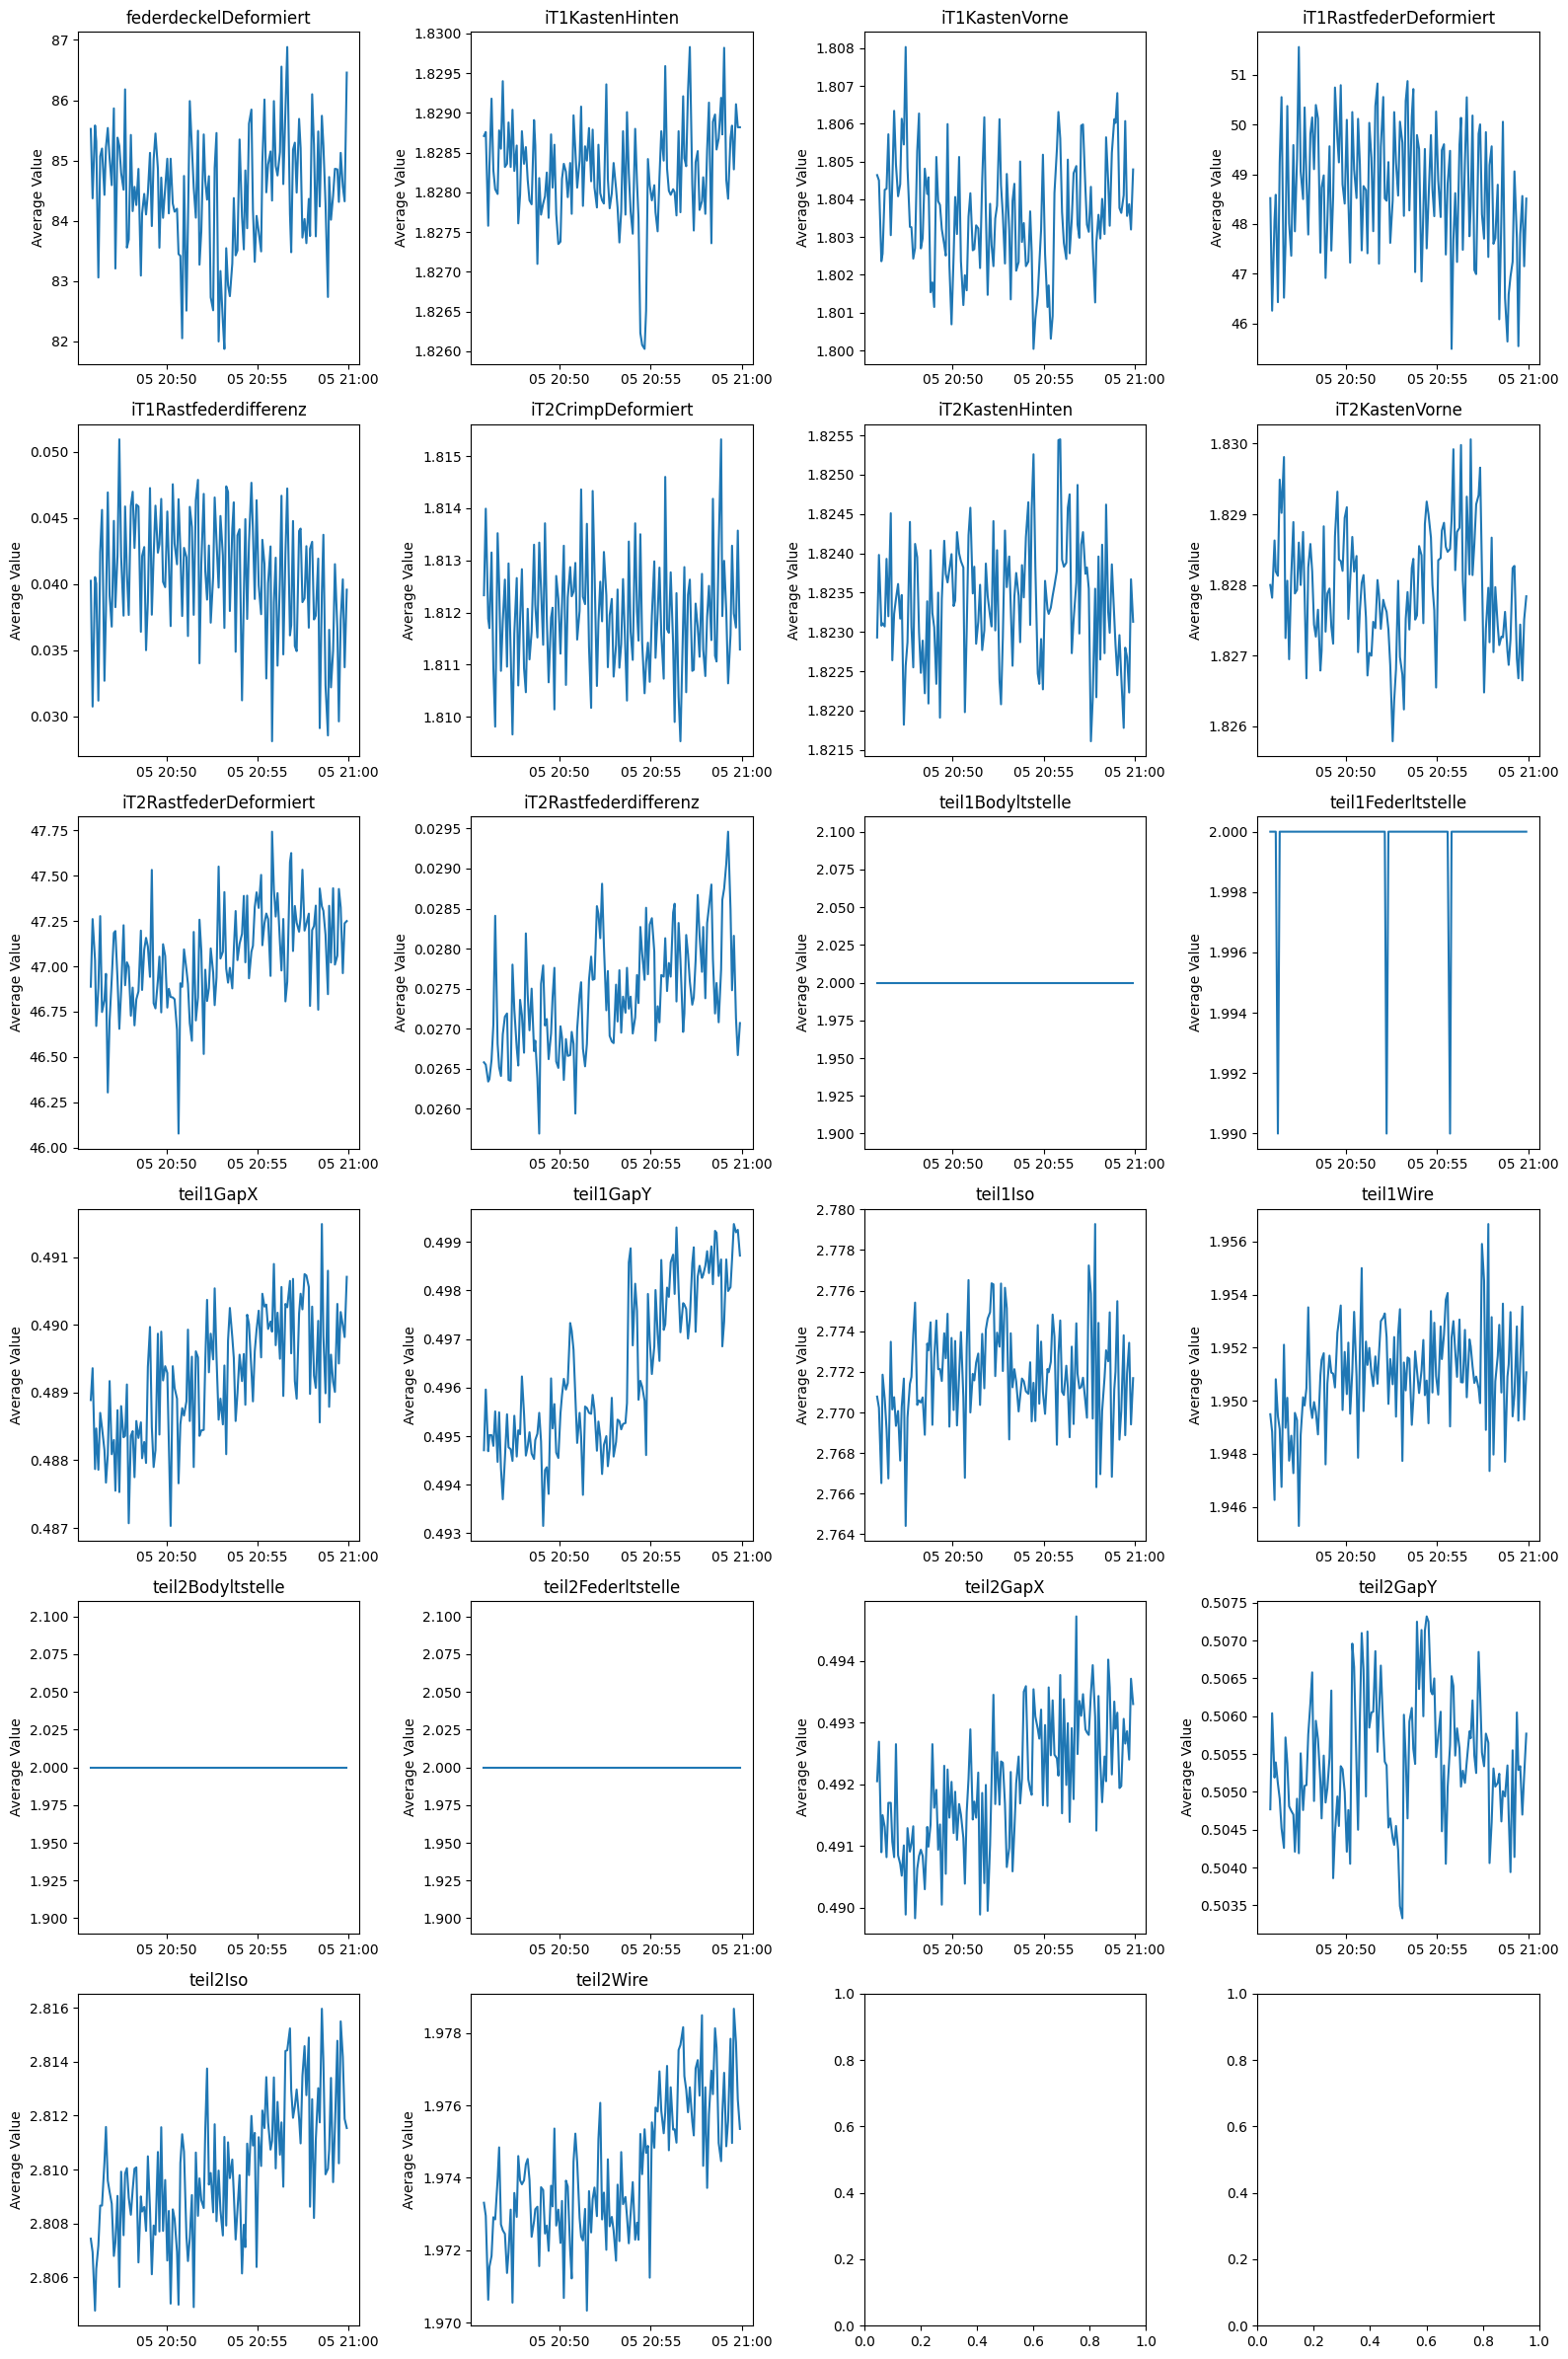

In [106]:
# Total Variables
total_vars = sorted(small_data.variable_name.unique().tolist())

n = len(total_vars)
cols = 4
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
axes = axes.flatten()

for i, var in enumerate(total_vars):
    temp = small_data[small_data["variable_name"] == var]
    axes[i].plot(temp["timestamp"], temp["average_value"])
    axes[i].set_title(var)
    axes[i].set_ylabel("Average Value")


plt.tight_layout()
plt.show()

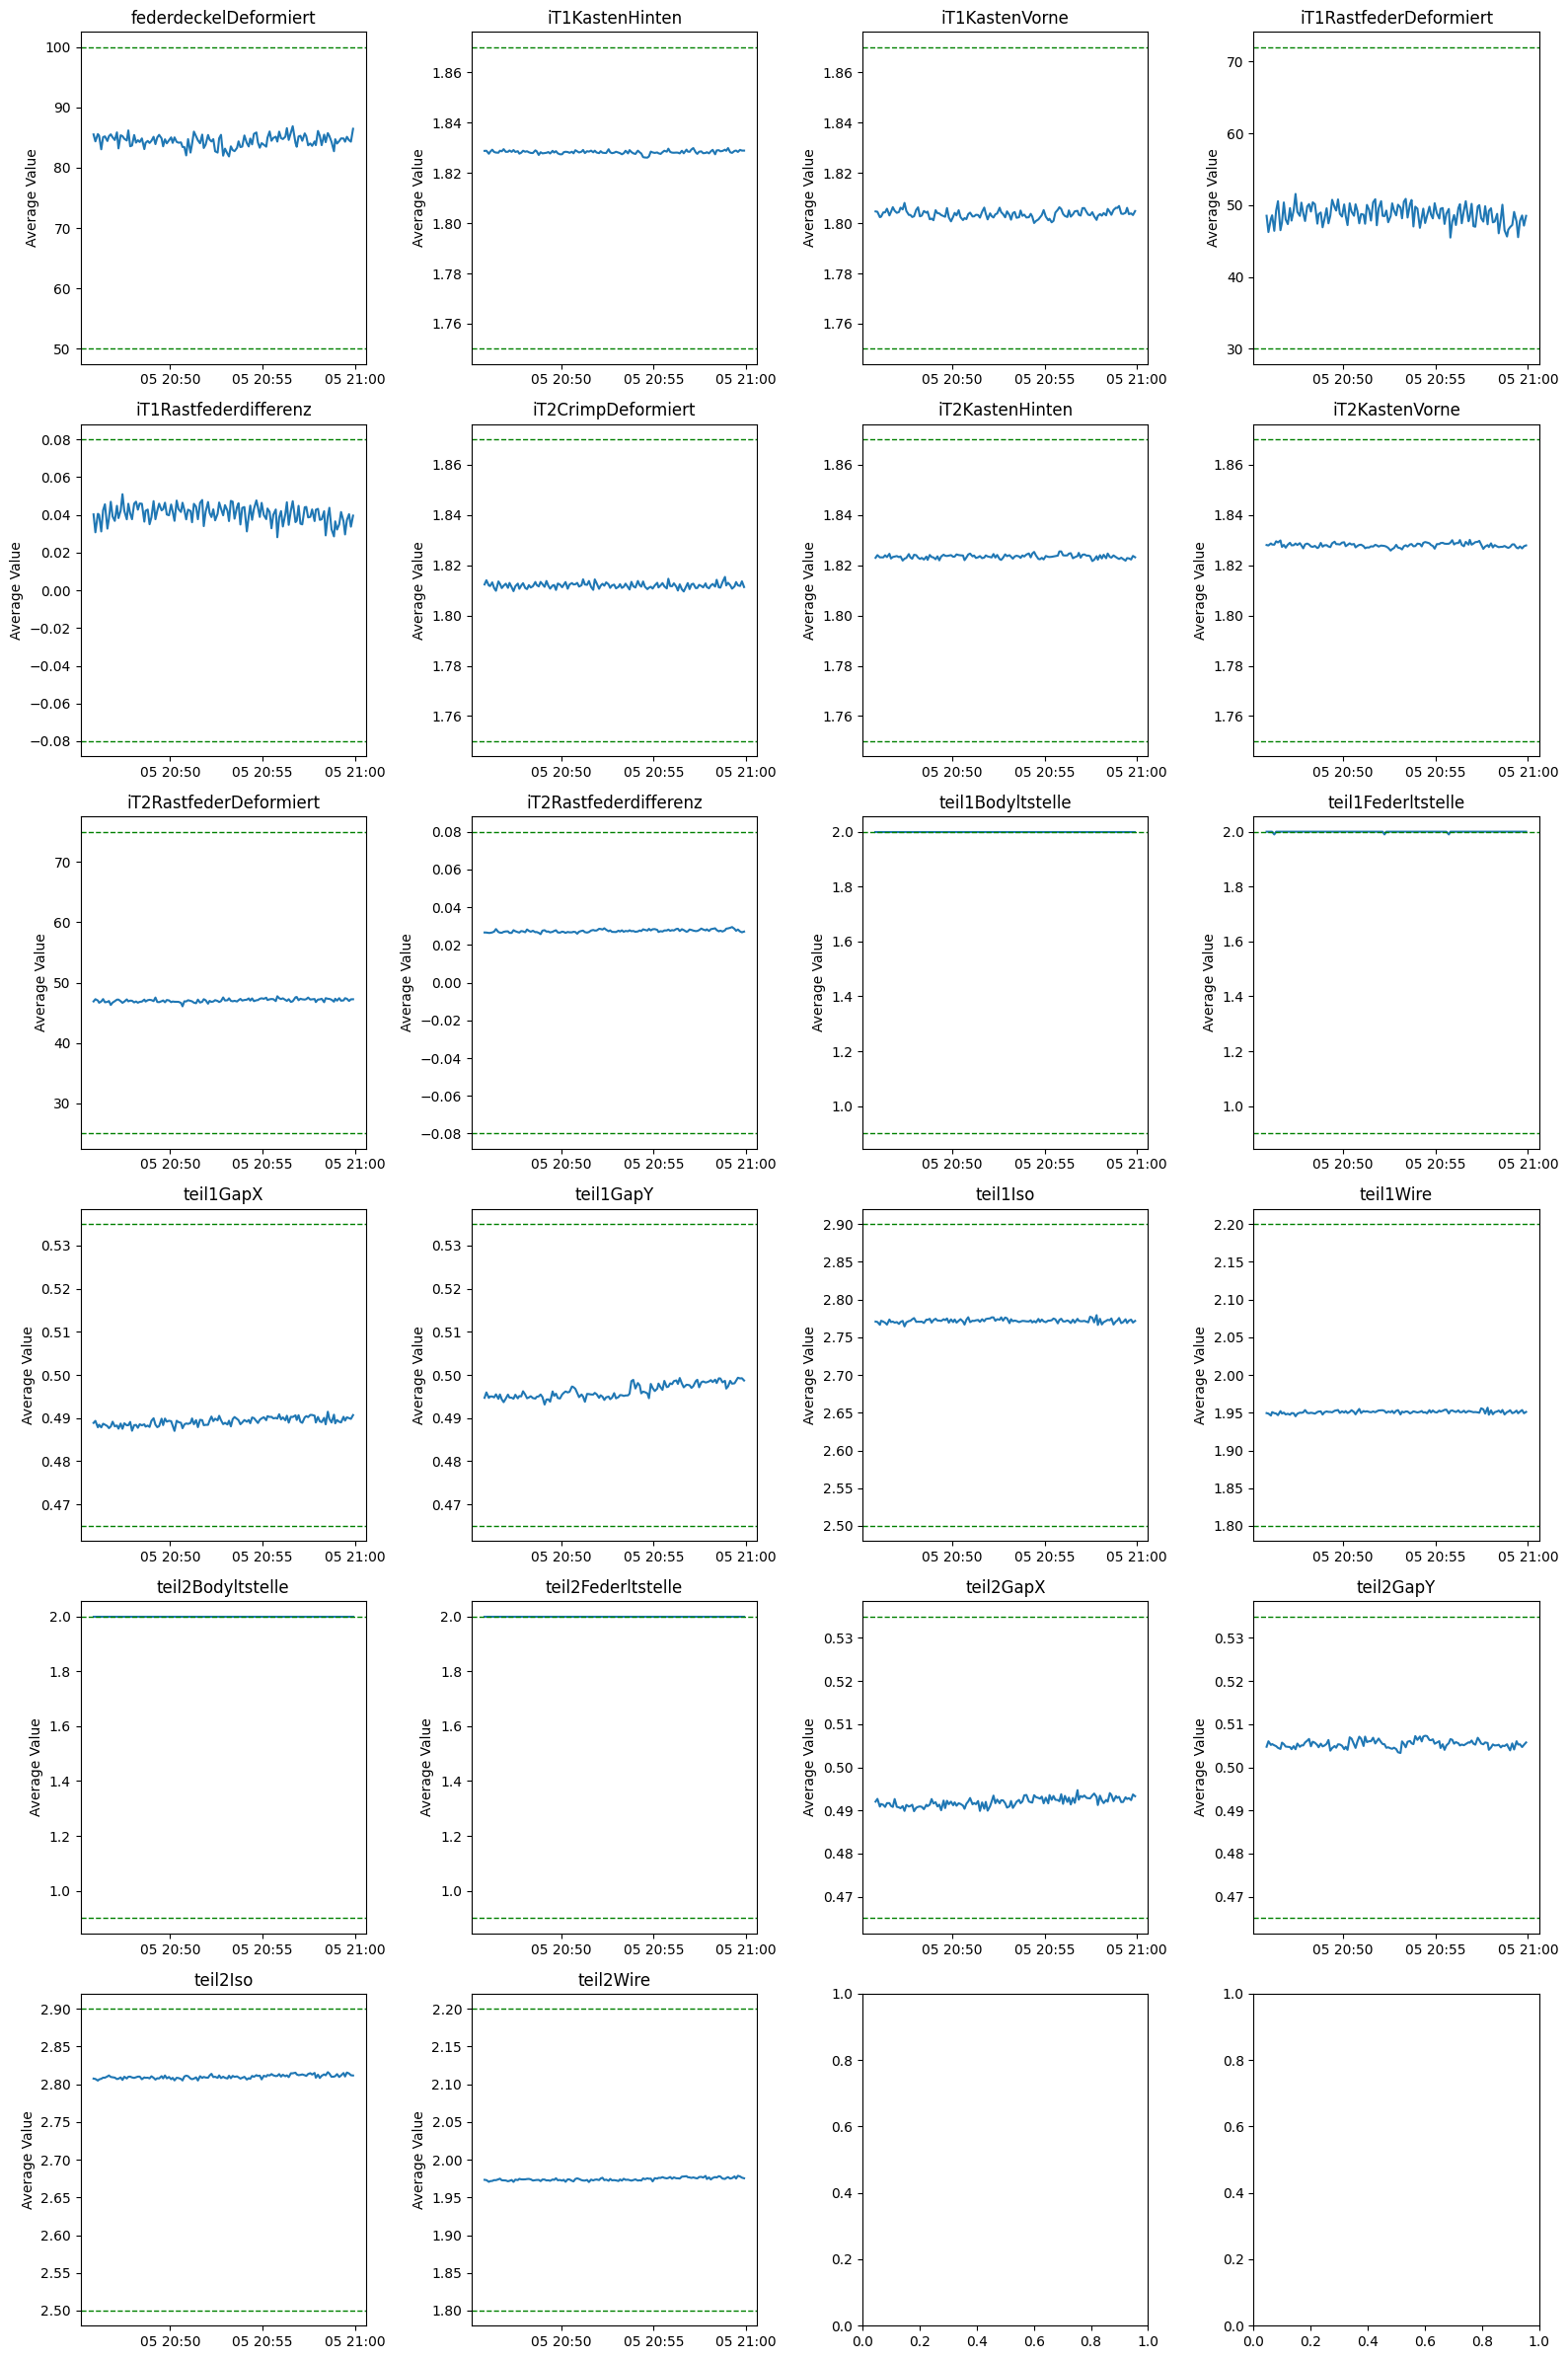

In [107]:
# Plots with upper and Lower Limits

# Total Variables
total_vars = sorted(small_data.variable_name.unique().tolist())

n = len(total_vars)
cols = 4
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
axes = axes.flatten()

for i, var in enumerate(total_vars):
    temp = small_data[small_data["variable_name"] == var]
    axes[i].plot(temp["timestamp"], temp["average_value"])
    axes[i].set_title(var)
    axes[i].set_ylabel("Average Value")
    lowerLimit = temp.lowerLimit.values[0]
    upperLimit = temp.upperLimit.values[0]
    nominalValue = temp.nominalValue.values[0]
    axes[i].axhline(y=lowerLimit + nominalValue, color='green', linestyle='--', linewidth=1)
    axes[i].axhline(y=upperLimit + nominalValue, color='green', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()
